In [1]:
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())

import pandas as pd
from pandas import DataFrame
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
import scipy

/home/jovyan/.local/share/jupyter


In [2]:
# read self reporting data
self_reports = pd.read_csv("../notch_data/self_report.csv", index_col=False)

# visualize self reporting data:

# %matplotlib inline
# sns.set(style="ticks", color_codes=True)
# sns_plot = sns.pairplot(self_reports, hue='Induced', size=2)

In [3]:
# read notch data into dict "data"
participant_order = []
dirs = glob("../notch_data/*")
data = defaultdict(dict)
for d in dirs:
    files = glob(d+"/*")
    dir_name = d.split('/')[-1]
    if dir_name != 'self_report.csv':
        participant_order.append(dir_name)
        for f in files:
            name = "/".join(f.split("/")[2:]).split(".")[0].split("/")
            data[name[0]][name[1]] = pd.read_csv(f, index_col=False)


In [4]:
# read empa data into dict "empa_data"
dirs = glob("../empatica_data/*")
empa_data = defaultdict(dict)
for d in dirs:
    files = glob(d+"/*")
    for f in files:
        name = "/".join(f.split("/")[2:]).split(".")[0].split("/")

        empa_data[name[0]][name[1]] = pd.read_csv(f, index_col=False)

In [5]:
# read typing data into dict "typing_data"
dirs = glob("../typing_data/*")
typing_data = defaultdict(dict)
for d in dirs:
    files = glob(d+"/*")
    for f in files:
        name = "/".join(f.split("/")[2:]).split(".")[0].split("/")
        typing_data[name[0]][name[1]] = pd.read_csv(f, usecols=[1,2])
        

In [6]:
window_count = 30

total_len = 2370
window_len = int(total_len / window_count)
windows = defaultdict(dict)

empa_total_len = 1920
empa_window_len = int(empa_total_len / window_count)
empa_windows = defaultdict(dict)

hr_total_len = 60
hr_window_len = int(hr_total_len / window_count)
hr_windows = defaultdict(dict)

typing_windows = defaultdict(dict)

In [7]:
# divide time series into windows
for participant in data:
    for w in range(0, total_len, window_len):
        frames = []
        for body_part in data[participant]:
            temp_df = data[participant][body_part].ix[w:w+window_len-1]
            temp_df.columns = [body_part+'_'+c  for c in temp_df.columns]
            frames.append(temp_df)
        if w/window_len == 60:
            print("HOLY SHIT")
        windows[participant][str(int(w/window_len))] = pd.concat(frames, axis=1)

In [8]:
# divide time series into windows
for participant in empa_data:
    for w in range(0, empa_total_len, empa_window_len):
        empa_frames = []
        for body_part in empa_data[participant]:
            if body_part == 'ACC':
                temp_df = empa_data[participant][body_part].ix[w:w+empa_window_len-1]
                temp_df.columns = [body_part+'_'+c  for c in temp_df.columns]
                empa_frames.append(temp_df)
        empa_windows[participant][str(int(w/empa_window_len))] = pd.concat(empa_frames, axis=1)  

In [9]:
# divide time series into windows
for participant in empa_data:
    for w in range(0, hr_total_len, hr_window_len):
        hr_frames = []
        for body_part in empa_data[participant]:
            if body_part == 'HR':
                temp_df = empa_data[participant][body_part].ix[w:w+hr_window_len-1]
                temp_df.columns = [body_part+'_'+c  for c in temp_df.columns]
                hr_frames.append(temp_df)
        hr_windows[participant][str(int(w/hr_window_len))] = pd.concat(hr_frames, axis=1)

In [10]:
# divide time series into windows
feature_name = 'typing_data'
time_column = 'time'
valid_column = 'valid'
for participant in typing_data:
    participant_data = typing_data[participant][feature_name]
    first_timestamp = participant_data[time_column][0]
    last_index = len(participant_data) - 1
    last_timestamp = participant_data[time_column][last_index]
    tp_frames = []
    duration = last_timestamp - first_timestamp
#     print(duration)
    for i in range(window_count):
        lower_bound = first_timestamp + ((i * (duration)) / window_count)
        upper_bound = lower_bound + duration / window_count
        character_count = 0
        mistake_count = 0
        for j in range(len(participant_data[time_column])):
            if participant_data[time_column][j] >= lower_bound and participant_data[time_column][j] < upper_bound:
                character_count += 1
                if len(str(participant_data[valid_column][j])) == len('False'):
                    mistake_count += 1
        data = {'tp_error':pd.Series([mistake_count]),'tp_pace':pd.Series([character_count])}
        new_window = DataFrame(data,columns=['tp_error','tp_pace'])
        typing_windows[participant][str(int(i))] = new_window
print(typing_windows)
    

#         typing_windows.append(new_window)
        
#         print(tp_frames)
#     for a in typing_data[participant][feature_name]:
        
#     for w in range(0, hr_total_len, hr_window_len):
#         hr_frames = []
#         for body_part in empa_data[participant]:
#             if body_part == 'HR':
#                 temp_df = empa_data[participant][body_part].ix[w:w+hr_window_len-1]
#                 temp_df.columns = [body_part+'_'+c  for c in temp_df.columns]
#                 hr_frames.append(temp_df)
#         hr_windows[participant][str((w/hr_window_len))] = pd.concat(hr_frames, axis=1)

defaultdict(<class 'dict'>, {'Happy5': {'12':    tp_error  tp_pace
0         6       10, '27':    tp_error  tp_pace
0         0       10, '1':    tp_error  tp_pace
0         0       13, '4':    tp_error  tp_pace
0         0       13, '15':    tp_error  tp_pace
0         0       14, '2':    tp_error  tp_pace
0         1       17, '24':    tp_error  tp_pace
0         0       15, '18':    tp_error  tp_pace
0         1       10, '8':    tp_error  tp_pace
0         0       13, '13':    tp_error  tp_pace
0         0        8, '16':    tp_error  tp_pace
0         0       14, '11':    tp_error  tp_pace
0         3        3, '20':    tp_error  tp_pace
0         1       14, '26':    tp_error  tp_pace
0         1        7, '29':    tp_error  tp_pace
0         0       16, '17':    tp_error  tp_pace
0         0       14, '5':    tp_error  tp_pace
0         0       11, '7':    tp_error  tp_pace
0         0       16, '3':    tp_error  tp_pace
0         0        9, '25':    tp_error  tp_pace
0        

In [11]:
# create labels for classifier

def create_labels(y):
    # sad = y[(y.Pleasure - y.Pleasure.median()) < 0].Participant.tolist()
    # happy = y[(y.Pleasure - y.Pleasure.median()) > 0].Participant.tolist()
    sad = [x for x in y.Participant if x[0] == 'S']
    happy = [x for x in y.Participant if x[0] == 'H']
    return sad, happy

sad, happy = create_labels(self_reports)

In [12]:
# create dataframe for classifier
def create_df(window, empa_window, hr_window, tp_window, y, participant):
    labels = []
    test = np.zeros([len(window),19])
    for index in window:
        print(index)
        a = np.array(window[index].std())
        for col in range(13):
            test[int(float(index))][col] = a[col]
        
        b = np.array(empa_window[index].std())
        for col in range(13,16):
            test[int(float(index))][col] = b[col-13]
        
#         if window size is only 1 for HR then std will return Nan
#         c = np.array(hr_window[index].std())
        c = np.array(hr_window[index])
        for col in range(16,17):
            test[int(float(index))][col] = c[col-16]

            
        d = np.array(tp_window[index])
        for col in range(17,19):
            test[int(float(index))][col] = d[0][col-17]
            
        if participant in happy:
            labels.append(1)
        else:
            labels.append(-1)
            
    X = pd.DataFrame(test)
    labels = pd.Series(labels)
    
    return X, labels

In [13]:
test_parts = ['Happy1', 'Sad1']

# training set 
x_frames = []
y_frames = []

for w in participant_order:
    print(w)
    if w not in test_parts:
        xx,yy = create_df(windows[w], empa_windows[w], hr_windows[w], typing_windows[w], self_reports, participant=w)
        x_frames.append(xx)
        y_frames.append(yy)
        
Xtr = pd.concat(x_frames, axis=0)
ytr = pd.concat(y_frames, axis=0)
        
# test set
x_frames = []
y_frames = []
for w in test_parts:
    xx,yy = create_df(windows[w], empa_windows[w], hr_windows[w], typing_windows[w], self_reports, participant=w)
    x_frames.append(xx)
    y_frames.append(yy)

Xte = pd.concat(x_frames, axis=0)
yte = pd.concat(y_frames, axis=0)

# all data 
X = pd.concat([Xtr, Xte], axis=0).reset_index(drop=True)
y = pd.concat([ytr, yte], axis=0).reset_index(drop=True)

Happy1
Happy3
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Happy4
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Happy5
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Happy6
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Sad1
Sad2
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Sad3
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Sad4
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
Sad5
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0
12
27
1
4
15
2
24
18
8
13
16
11
20
26
29
17
5
7
3
25
9
23
21
22
6
28
14
10
19
0


In [14]:
print(len(Xtr))
print(len(Xte))

240
60


In [15]:
cols = X.columns
#X = pd.DataFrame(scipy.stats.zscore(X), columns=cols)

In [16]:
print(X.shape)
print(y.shape)

(300, 19)
(300,)


In [17]:
# plot 
X_plot = pd.concat([X, pd.DataFrame(y, columns=['label'])], axis=1)

# sns.set(style="ticks", color_codes=True)
# sns_plot = sns.pairplot(X_plot, hue='label', size=3)
# sns_plot.savefig("output_window15_maxmin.pdf")

In [18]:
print(len(Xtr))
print(len(Xte))

240
60


In [19]:
from sklearn.linear_model import LogisticRegression as logit
from sklearn.ensemble import RandomForestClassifier as rf

model = logit(penalty='l2', C=0.1)
model = rf(n_estimators=500)

model.fit(Xtr, ytr)

print(model.score(Xte, yte))

print(model.score(Xtr, ytr))

print(model.predict(Xte))
print(list(yte))


0.3
1.0
[-1 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [20]:
clf = svm.SVC(C=0.05)

In [21]:
clf.fit(Xtr, ytr)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
print(clf.score(Xte, yte))

0.433333333333


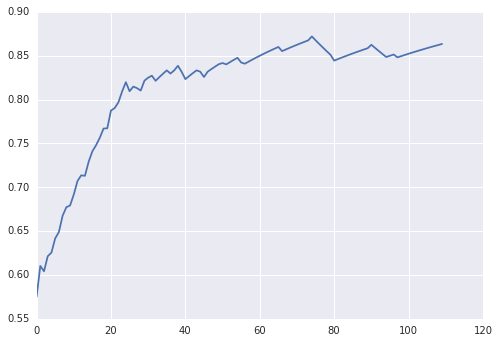

0.872023809524


In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
scores = []

# cv_values = range(80,100,5)

# def abcd(n):
#     pop_this = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18]
#     pop_this.pop(n)
#     return pop_this

# for k in range(19):
#     X1 = Xtr.copy(deep=True)
#     for l in [0,1,2,3,4,5,6,7,9,10,11,13,14,15,17,18]:
#         X1.pop(Xtr.columns[l])
#     best = max([cross_val_score(estimator=clf, X=X1, y=ytr, scoring='accuracy', cv=i).mean() for i in cv_values])
#     print(k,best)    








X1 = Xtr.copy(deep=True)
for l in [0,1,2,3,4,5,6,7,9,10,11,13,14,15,17,18]:
    X1.pop(Xtr.columns[l])
for i in range(10,120,1):
    mean_value = cross_val_score(estimator=clf, X=X1, y=ytr, scoring='accuracy', cv=i).mean()
    scores.append(mean_value)

plt.plot(scores)
plt.show()
print(max(scores))
# print (len(Xtr))
# print(cross_val_score(estimator=clf, X=Xtr, y=ytr, scoring='accuracy', cv=120).mean())

In [24]:
print(sad)
print(happy)

['Sad4', 'Sad5', 'Sad1', 'Sad2', 'Sad3']
['Happy4', 'Happy5', 'Happy6', 'Happy1', 'Happy3']
